## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

________________

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

# 4.1 Caperucita Roja

In [1]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
X = np.array([[1,1,0,0],[0,1,1,0],[0,0,0,1]])
y = np.array([[1,0,0,0],[0,0,1,1],[0,1,1,0]])

In [2]:
X

array([[1, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1]])

In [3]:
y

array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

In [4]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=110)

In [5]:
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=110,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [6]:
clf.predict(X)

array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

## Other Inputs & Results 

In [9]:


X_test=np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1],[1,0,0,0],
                 [0,1,1,1],[0,1,1,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1],[0,0,0,0]])
y_pred=clf.predict(X_test)

In [14]:
DF=pd.DataFrame(np.concatenate((X_test,y_pred),axis=1),
             columns=['In_Big Ears', 'In_Big Teeth', 'In_Handsome', 'In_Wrinkled', 'Out_Scream', 'Out_Hug','Out_Food','Out_Kiss'])

### Se crea un Dataframe que muestra los estados de las variables de entrada In_ y las respectivas salidas o resultados Out_

In [15]:
DF

,In_Big Ears,In_Big Teeth,In_Handsome,In_Wrinkled,Out_Scream,Out_Hug,Out_Food,Out_Kiss
0,1,1,1,1,0,0,1,0
1,1,1,1,0,1,0,0,1
2,1,1,0,1,1,0,0,0
3,1,1,0,0,1,0,0,0
4,1,0,1,1,0,0,1,0
5,1,0,1,0,0,0,1,1
6,1,0,0,1,1,0,1,0
7,1,0,0,0,1,0,0,0
8,0,1,1,1,0,1,1,0
9,0,1,1,0,0,0,1,1


# Using Keras

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense

In [23]:
training_data = np.array([[1,1,0,0],[0,1,1,0],[0,0,0,1]], "float32")
target_data = np.array([[1,0,0,0],[0,0,1,1],[0,1,1,0]], "float32")

In [24]:
modelKeras = Sequential()
modelKeras.add(Dense(16, input_dim=4, activation='relu'))
modelKeras.add(Dense(4, activation='sigmoid'))


In [25]:
modelKeras.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [32]:
modelKeras.fit(training_data, target_data, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0075 - binary_accuracy: 1.0000
Epoch 2/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 3/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0074 - binary_accuracy: 1.0000
Epoch 4/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0073 - binary_accuracy: 1.0000
Epoch 5/1000
3/3 [==============================] - 0s 998us/step - loss: 0.0073 - binary_accuracy: 1.0000
Epoch 6/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0073 - binary_accuracy: 1.0000
Epoch 7/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 8/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 9/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0072 - binary_accuracy: 1.0000
Epoch 10/1000
3/3 [===================

Epoch 77/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0052 - binary_accuracy: 1.0000
Epoch 78/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0052 - binary_accuracy: 1.0000
Epoch 79/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 80/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 81/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 82/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 83/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0051 - binary_accuracy: 1.0000
Epoch 84/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0050 - binary_accuracy: 1.0000
Epoch 85/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0050 - binary_accuracy: 1.0000
Epoch 86/1000
3/3 [=========

Epoch 153/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0038 - binary_accuracy: 1.0000
Epoch 154/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0038 - binary_accuracy: 1.0000
Epoch 155/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0038 - binary_accuracy: 1.0000
Epoch 156/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 157/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 158/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 159/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 160/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 161/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0037 - binary_accuracy: 1.0000
Epoch 162/1000
3/3 

Epoch 229/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 230/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 231/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 232/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 233/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 234/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 235/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 236/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 237/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 238/1000
3/3 [=

Epoch 305/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 306/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 307/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 308/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 309/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 310/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0022 - binary_accuracy: 1.0000
Epoch 311/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 312/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 313/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0021 - binary_accuracy: 1.0000
Epoch 314/1000
3/3 [===

Epoch 381/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 382/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 383/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 384/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 385/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 386/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 387/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 388/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 389/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0017 - binary_accuracy: 1.0000
Epoch 390/1000
3/3 [

Epoch 457/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 458/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 459/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 460/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 461/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 462/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 463/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 464/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 465/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 466/1000
3/3 [===

Epoch 533/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 534/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 535/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 536/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 537/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 538/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 539/1000
3/3 [==============================] - 0s 667us/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 540/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 541/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0012 - binary_accuracy: 1.0000
Epoch 542/1000
3/

Epoch 609/1000
3/3 [==============================] - 0s 1000us/step - loss: 9.9307e-04 - binary_accuracy: 1.0000
Epoch 610/1000
3/3 [==============================] - 0s 1000us/step - loss: 9.9091e-04 - binary_accuracy: 1.0000
Epoch 611/1000
3/3 [==============================] - 0s 666us/step - loss: 9.8874e-04 - binary_accuracy: 1.0000
Epoch 612/1000
3/3 [==============================] - 0s 999us/step - loss: 9.8660e-04 - binary_accuracy: 1.0000
Epoch 613/1000
3/3 [==============================] - 0s 666us/step - loss: 9.8445e-04 - binary_accuracy: 1.0000
Epoch 614/1000
3/3 [==============================] - 0s 1ms/step - loss: 9.8231e-04 - binary_accuracy: 1.0000
Epoch 615/1000
3/3 [==============================] - 0s 999us/step - loss: 9.8019e-04 - binary_accuracy: 1.0000
Epoch 616/1000
3/3 [==============================] - 0s 999us/step - loss: 9.7806e-04 - binary_accuracy: 1.0000
Epoch 617/1000
3/3 [==============================] - 0s 1ms/step - loss: 9.7593e-04 - binary_ac

Epoch 682/1000
3/3 [==============================] - 0s 999us/step - loss: 8.5115e-04 - binary_accuracy: 1.0000
Epoch 683/1000
3/3 [==============================] - 0s 666us/step - loss: 8.4941e-04 - binary_accuracy: 1.0000
Epoch 684/1000
3/3 [==============================] - 0s 1000us/step - loss: 8.4769e-04 - binary_accuracy: 1.0000
Epoch 685/1000
3/3 [==============================] - 0s 999us/step - loss: 8.4597e-04 - binary_accuracy: 1.0000
Epoch 686/1000
3/3 [==============================] - 0s 999us/step - loss: 8.4424e-04 - binary_accuracy: 1.0000
Epoch 687/1000
3/3 [==============================] - 0s 1000us/step - loss: 8.4252e-04 - binary_accuracy: 1.0000
Epoch 688/1000
3/3 [==============================] - 0s 666us/step - loss: 8.4082e-04 - binary_accuracy: 1.0000
Epoch 689/1000
3/3 [==============================] - 0s 666us/step - loss: 8.3911e-04 - binary_accuracy: 1.0000
Epoch 690/1000
3/3 [==============================] - 0s 999us/step - loss: 8.3740e-04 - binar

Epoch 755/1000
3/3 [==============================] - 0s 999us/step - loss: 7.3662e-04 - binary_accuracy: 1.0000
Epoch 756/1000
3/3 [==============================] - 0s 999us/step - loss: 7.3520e-04 - binary_accuracy: 1.0000
Epoch 757/1000
3/3 [==============================] - 0s 999us/step - loss: 7.3379e-04 - binary_accuracy: 1.0000
Epoch 758/1000
3/3 [==============================] - 0s 666us/step - loss: 7.3239e-04 - binary_accuracy: 1.0000
Epoch 759/1000
3/3 [==============================] - 0s 666us/step - loss: 7.3099e-04 - binary_accuracy: 1.0000
Epoch 760/1000
3/3 [==============================] - 0s 666us/step - loss: 7.2959e-04 - binary_accuracy: 1.0000
Epoch 761/1000
3/3 [==============================] - 0s 999us/step - loss: 7.2819e-04 - binary_accuracy: 1.0000
Epoch 762/1000
3/3 [==============================] - 0s 666us/step - loss: 7.2681e-04 - binary_accuracy: 1.0000
Epoch 763/1000
3/3 [==============================] - 0s 666us/step - loss: 7.2543e-04 - binary_

Epoch 828/1000
3/3 [==============================] - 0s 999us/step - loss: 6.4286e-04 - binary_accuracy: 1.0000
Epoch 829/1000
3/3 [==============================] - 0s 999us/step - loss: 6.4169e-04 - binary_accuracy: 1.0000
Epoch 830/1000
3/3 [==============================] - 0s 666us/step - loss: 6.4053e-04 - binary_accuracy: 1.0000
Epoch 831/1000
3/3 [==============================] - 0s 666us/step - loss: 6.3937e-04 - binary_accuracy: 1.0000
Epoch 832/1000
3/3 [==============================] - 0s 666us/step - loss: 6.3822e-04 - binary_accuracy: 1.0000
Epoch 833/1000
3/3 [==============================] - 0s 4ms/step - loss: 6.3707e-04 - binary_accuracy: 1.0000
Epoch 834/1000
3/3 [==============================] - 0s 666us/step - loss: 6.3592e-04 - binary_accuracy: 1.0000
Epoch 835/1000
3/3 [==============================] - 0s 666us/step - loss: 6.3477e-04 - binary_accuracy: 1.0000
Epoch 836/1000
3/3 [==============================] - 0s 666us/step - loss: 6.3363e-04 - binary_ac

Epoch 901/1000
3/3 [==============================] - 0s 999us/step - loss: 5.6518e-04 - binary_accuracy: 1.0000
Epoch 902/1000
3/3 [==============================] - 0s 999us/step - loss: 5.6421e-04 - binary_accuracy: 1.0000
Epoch 903/1000
3/3 [==============================] - 0s 1000us/step - loss: 5.6324e-04 - binary_accuracy: 1.0000
Epoch 904/1000
3/3 [==============================] - 0s 667us/step - loss: 5.6229e-04 - binary_accuracy: 1.0000
Epoch 905/1000
3/3 [==============================] - 0s 666us/step - loss: 5.6132e-04 - binary_accuracy: 1.0000
Epoch 906/1000
3/3 [==============================] - 0s 666us/step - loss: 5.6036e-04 - binary_accuracy: 1.0000
Epoch 907/1000
3/3 [==============================] - 0s 1000us/step - loss: 5.5940e-04 - binary_accuracy: 1.0000
Epoch 908/1000
3/3 [==============================] - 0s 999us/step - loss: 5.5845e-04 - binary_accuracy: 1.0000
Epoch 909/1000
3/3 [==============================] - 0s 666us/step - loss: 5.5750e-04 - binar

Epoch 974/1000
3/3 [==============================] - 0s 999us/step - loss: 5.0017e-04 - binary_accuracy: 1.0000
Epoch 975/1000
3/3 [==============================] - 0s 999us/step - loss: 4.9935e-04 - binary_accuracy: 1.0000
Epoch 976/1000
3/3 [==============================] - 0s 666us/step - loss: 4.9853e-04 - binary_accuracy: 1.0000
Epoch 977/1000
3/3 [==============================] - 0s 999us/step - loss: 4.9772e-04 - binary_accuracy: 1.0000
Epoch 978/1000
3/3 [==============================] - 0s 999us/step - loss: 4.9691e-04 - binary_accuracy: 1.0000
Epoch 979/1000
3/3 [==============================] - 0s 999us/step - loss: 4.9611e-04 - binary_accuracy: 1.0000
Epoch 980/1000
3/3 [==============================] - 0s 999us/step - loss: 4.9530e-04 - binary_accuracy: 1.0000
Epoch 981/1000
3/3 [==============================] - 0s 999us/step - loss: 4.9449e-04 - binary_accuracy: 1.0000
Epoch 982/1000
3/3 [==============================] - 0s 999us/step - loss: 4.9369e-04 - binary_

In [28]:
scores = modelKeras.evaluate(training_data, target_data)
 
print((modelKeras.metrics_names[1], scores[1]*100))
print (modelKeras.predict(training_data).round())

3/3 [==============================] - 0s 333us/step
('binary_accuracy', 100.0)
[[1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]]


## Other Inputs & Results in Keras 
### Using same Inputs that Sklearn (X_test)

In [37]:
y_pred=modelKeras.predict(X_test)
y_pred=np.round(y_pred)

In [38]:
DF_Keras=pd.DataFrame(np.concatenate((X_test,y_pred),axis=1),
             columns=['In_Big Ears', 'In_Big Teeth', 'In_Handsome', 'In_Wrinkled', 'Out_Scream', 'Out_Hug','Out_Food','Out_Kiss'])

In [39]:
DF_Keras

,In_Big Ears,In_Big Teeth,In_Handsome,In_Wrinkled,Out_Scream,Out_Hug,Out_Food,Out_Kiss
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


# 4.2 Boston House Price Prediction

In [40]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np

In [41]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.3 Feature analysis

In [42]:
x= pd.DataFrame(df.loc[:,['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE','MEDV']])

C:\Users\Edgardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257670CF860>,
      dtype=object)

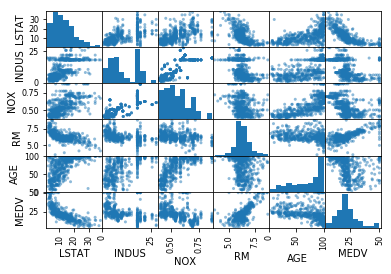

In [43]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(x)


### Do you find any relationship between the features?


A partir de la gráfica de dispersión se observa una relación lineal directa entre la variable dependiente y RM (prom habitaciones), mientras se tiene una relacion lineal inversa entre LSTAT (% de status bajo o estrato bajo) y la variable depediente.

Ahora bien, entre las variables independientes se tiene que existe una relación lineal inversa entre LSTAT y RM.

In [62]:
np.corrcoef(x)

array([[1.        , 0.99075004, 0.97819441, ..., 0.98581972, 0.98307924,
        0.95808787],
       [0.99075004, 1.        , 0.94982287, ..., 0.99668853, 0.99682335,
        0.98682013],
       [0.97819441, 0.94982287, 1.        , ..., 0.94907484, 0.942261  ,
        0.89591008],
       ...,
       [0.98581972, 0.99668853, 0.94907484, ..., 1.        , 0.99973225,
        0.98987793],
       [0.98307924, 0.99682335, 0.942261  , ..., 0.99973225, 1.        ,
        0.99280619],
       [0.95808787, 0.98682013, 0.89591008, ..., 0.98987793, 0.99280619,
        1.        ]])

De acuerdo con la matriz de correlación, todas las variables presentan coeficientes de correlacion por encima del 90% en valor absoluto, de manera que todas estarian correlacionadas entre si. LAs mas correlacionadas son las mismas observadas en la gráfica de dispersión.

## Bonus

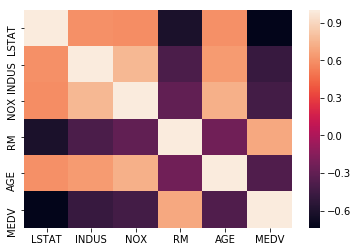

In [63]:
%matplotlib inline

# calculate the correlation matrix
corr = x.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## 4.4 Modeling linear and non linear relationships

In [46]:
D1= pd.DataFrame(df.loc[:,['RM','MEDV']])
D2= pd.DataFrame(df.loc[:,['LSTAT','MEDV']])
D2.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [47]:
from sklearn.model_selection import train_test_split

D1X_train, D1X_test, D1Y_train, D1Y_test = train_test_split(D1[['RM']],D1[['MEDV']], random_state=777,test_size=0.3)
D2X_train, D2X_test, D2Y_train, D2Y_test = train_test_split(D2[['LSTAT']],D2[['MEDV']], random_state=777,test_size=0.3)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

D1lr = LinearRegression()
D2lr = LinearRegression()
D1lr.fit(D1X_train,D1Y_train)
D2lr.fit(D2X_train,D2Y_train)
print('MSE D1: ', metrics.mean_squared_error(D1lr.predict(D1X_test),D1Y_test))
print('MSE D2: ', metrics.mean_squared_error(D2lr.predict(D2X_test),D2Y_test))


MSE D1:  38.28538058301148
MSE D2:  41.13441703570732


In [49]:
print("D1  Intercept: ",D1lr.intercept_,"w: ",D1lr.coef_ )
print("D2  Intercept: ",D2lr.intercept_,"w: ", D2lr.coef_)

D1  Intercept:  [-32.93862601] w:  [[8.83503992]]
D2  Intercept:  [34.7171401] w:  [[-0.96980747]]


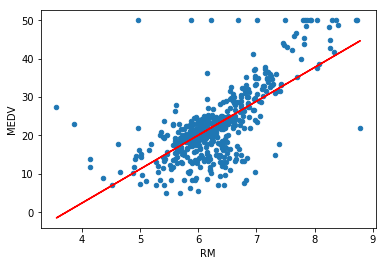

In [50]:
import matplotlib.pyplot as plt
D1.plot(x='RM',y='MEDV',kind ='scatter')
plt.plot(D1['RM'],D1lr.intercept_+D1lr.coef_[0]*D1['RM'], color ='red')

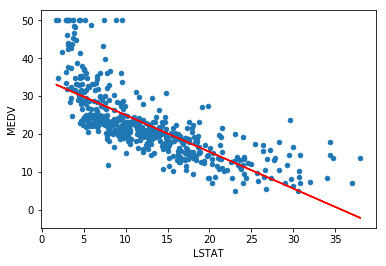

In [51]:
import matplotlib.pyplot as plt
D2.plot(x='LSTAT',y='MEDV',kind ='scatter')
plt.plot(D2['LSTAT'],D2lr.intercept_+D2lr.coef_[0]*D2['LSTAT'], color ='red')

De acuerdo con el MSE se tiene que el modelo D1 es mejor pues si MSE fue de 38.28 mientras el MSE del D2 fue de 41.13, en este sentido, la regresión lineal simple que predice el precio medio de las casas a traves del numero de Habitaciones es mas acertado que aquel que lo hace a traves de % de estrato bajo en la zona. 

## 4.5 Training a regression model


In [52]:
df.head()
dfX = df[df.columns.drop('MEDV')]
X_train, X_test, Y_train, Y_test = train_test_split(dfX,np.ravel(df[['MEDV']],order='C'), random_state=777,test_size=0.3)

In [53]:
lr =  LinearRegression()
lr.fit(X_train, Y_train)
print('MSE lr: ', metrics.mean_squared_error(lr.predict(X_test),Y_test))

MSE lr:  25.357256011213778


In [54]:
from sklearn.neural_network import MLPRegressor
MLPR = MLPRegressor(max_iter=700, learning_rate_init=0.0001)

In [55]:
MLPR.fit(X_train, Y_train)
print('MSE lr: ', metrics.mean_squared_error(MLPR.predict(X_test),Y_test))

MSE lr:  60.153062091665


C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [56]:
    from sklearn.model_selection import cross_val_score
    k=10  
    scores=cross_val_score(MLPR,X_train,Y_train,cv=k,scoring='neg_mean_squared_error')
    print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, 

MSE: 65.49 (+/- 86.52)


C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(dfX)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

In [58]:
lr.fit(X_train_s, Y_train)
print('MSE lr: ', metrics.mean_squared_error(lr.predict(X_test_s),Y_test))

MSE lr:  25.35725601121405


In [59]:
MLPR = MLPRegressor(max_iter=700, learning_rate_init=0.0001, hidden_layer_sizes=(128,512))
MLPR.fit(X_train_s, Y_train)
print('MSE lr: ', metrics.mean_squared_error(MLPR.predict(X_test_s),Y_test))

MSE lr:  15.66462107361266


C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [60]:
    from sklearn.model_selection import cross_val_score
    k=10  
    scores=cross_val_score(MLPR,X_train_s,Y_train,cv=k,scoring='neg_mean_squared_error')
    print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, 

MSE: 14.67 (+/- 18.24)


C:\Users\Edgardo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Which model has better performance? Why?

Los modelos escalados son mejores pues en este caso se tiene variables inputs que estan medidas en diferentes escalas y se hace
necesario "homogeneizar" su magnitud. 

Por otro lado, el modelo de redes neuronales permitió un mejor ajuste a traves de la calibración o tunning realizado al numero 
de neuronas.